In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.compose import ColumnTransformer

In [51]:
df = pd.DataFrame({
    'x':list(range(-100,100,5))
})
df.head()

,x
0,-100
1,-95
2,-90
3,-85
4,-80


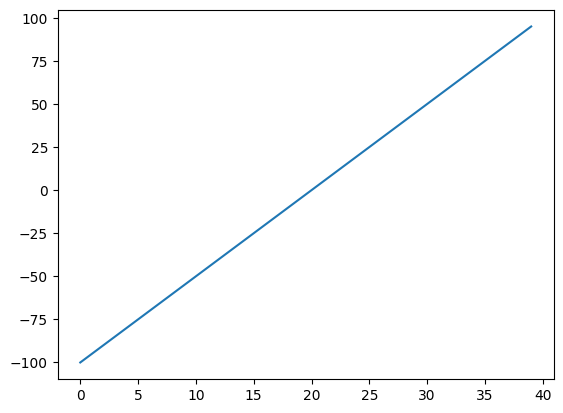

In [52]:
plt.plot(df['x'])

In [53]:
df['x2'] = df['x']**2
df['x3'] = df['x']**3   
df['x4'] = df['x']**4

df

,x,x2,x3,x4
0,-100,10000,-1000000,100000000
1,-95,9025,-857375,81450625
2,-90,8100,-729000,65610000
3,-85,7225,-614125,52200625
4,-80,6400,-512000,40960000
5,-75,5625,-421875,31640625
6,-70,4900,-343000,24010000
7,-65,4225,-274625,17850625
8,-60,3600,-216000,12960000
9,-55,3025,-166375,9150625


In [54]:
df = pd.read_csv('Position_Salaries.csv')
df.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [55]:
df

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


C:\Users\ACER\AppData\Local\Temp\ipykernel_10264\2538142475.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Salary'])


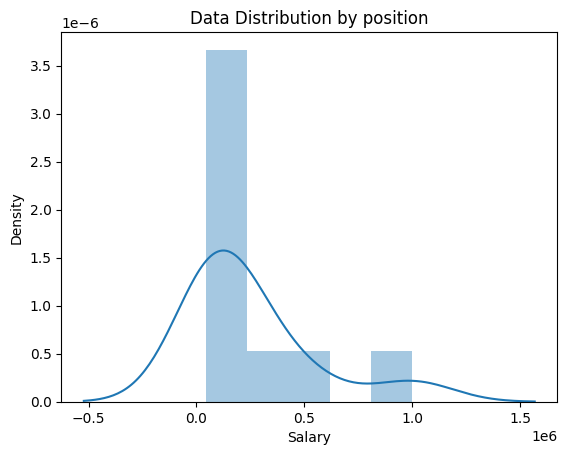

In [56]:
# Data Distribution
plt.title('Data Distribution by position')
sns.distplot(df['Salary'])
plt.show()

In [57]:
df.describe()

,Level,Salary
count,10.00000,10.000000
mean,5.50000,249500.000000
std,3.02765,299373.883668
min,1.00000,45000.000000
25%,3.25000,65000.000000
50%,5.50000,130000.000000
75%,7.75000,275000.000000
max,10.00000,1000000.000000


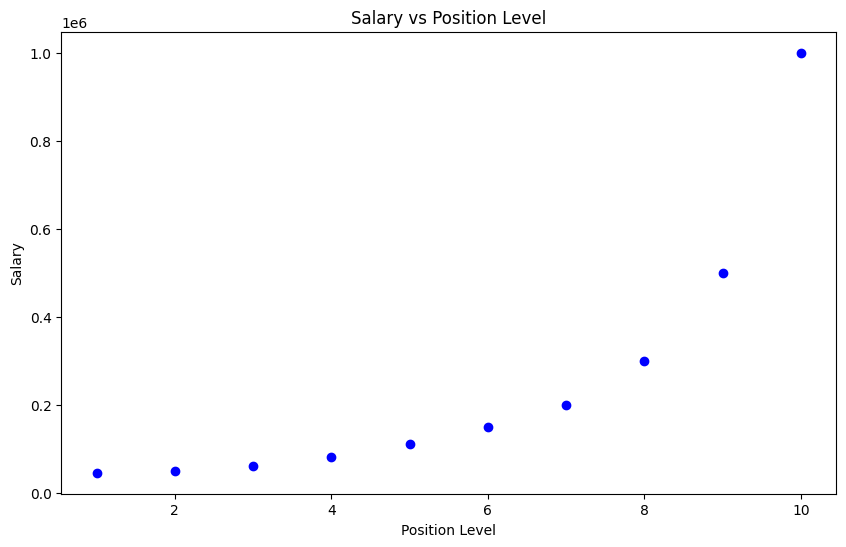

In [58]:
# relation between position and salary
plt.figure(figsize=(10, 6))
plt.scatter(df['Level'], df['Salary'], color='blue')
plt.title('Salary vs Position Level')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

In [59]:
x = df[['Level']]
y = df['Salary']

In [60]:
x

,Level
0,1
1,2
2,3
3,4
4,5
5,6
6,7
7,8
8,9
9,10


In [61]:
# Train the dataset
lr = LinearRegression()
lr.fit(x, y)



,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [62]:
#Polynomial Regression
pr = PolynomialFeatures(degree=5)
X_poly = pr.fit_transform(x)
lr2 = LinearRegression()
lr2.fit(X_poly, y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [63]:
# predict
y_pred_poly = lr2.predict(X_poly)
print(y_pred_poly)

y_pred_lr = lr.predict(x)
print(y_pred_lr)

[ 43895.10489603  53836.82983718  57065.26806579  77286.71328745
 112263.40326412 152736.59673702 201349.65034962 291571.09557057
 506617.71561662 998377.6223756 ]
[-114454.54545455  -33575.75757576   47303.03030303  128181.81818182
  209060.60606061  289939.39393939  370818.18181818  451696.96969697
  532575.75757576  613454.54545455]


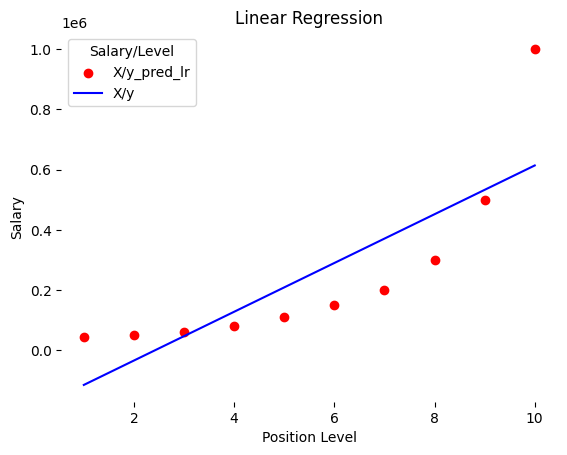

In [64]:
# Visualize the linear regression
plt.scatter(x, y, color='red')
plt.plot(x, y_pred_lr, color='blue')
plt.title('Linear Regression')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.legend(['X/y_pred_lr', 'X/y'], title="Salary/Level", loc='best', facecolor='white')
plt.box(False)
plt.show()

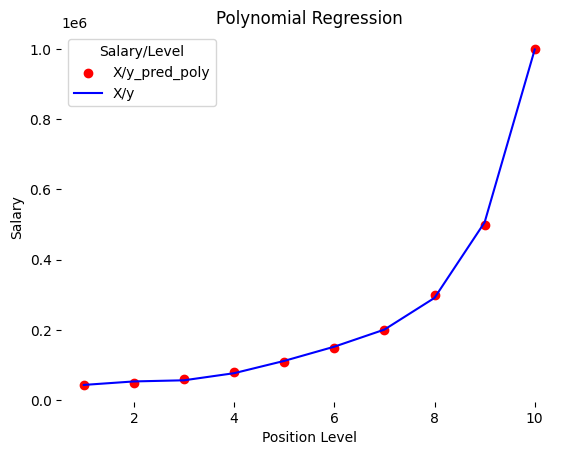

In [65]:
# Polynomial Regression
plt.scatter(x, y, color='red')
plt.plot(x, y_pred_poly, color='blue')
plt.title('Polynomial Regression')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.legend(['X/y_pred_poly', 'X/y'], title="Salary/Level", loc='best', facecolor='white')
plt.box(False)
plt.show()

In [66]:
print(f'lenear reg result: {lr.predict([[6.5]])}')

print(f'polynomial reg result: {lr2.predict(pr.fit_transform([[6.5]]))}')

lenear reg result: [330378.78787879]
polynomial reg result: [174878.07765173]


c:\Users\ACER\miniconda3\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
